# Programming for Data Analysis - Project 2

## Analysis of Breast Cancer Wisconsin(Diagnostic) dataset

### Introduction

Breast cancer is the development of cancerous cells within the breast tissue. These cells can grow and spread to other parts of the body, and if left untreated, can be life-threatening. Breast cancer is the most prevalent form of cancer among women, comprising approximately 25% of all cancers in women worldwide (World Health Organization, 2021). As per the American Cancer Society, in the United States, it is the second most common cancer in women, following skin cancer (American Cancer Society, 2021). 

To prevent deaths from breast cancer, it is essential to detect the disease early and receive modern treatment. One way to do this is to use modern computation technique like machine learning to analyze patient data, including demographics, medical history, and laboratory test results, in order to predict the likelihood of breast cancer development or identify risk factors. These techiques can be used to improve the accuracy and efficiency of breast cancer diagnosis and treatment.

Fine needle aspiration (FNA) is a simple procedure used to obtain cells or tissue from the body for diagnostic testing. In the context of breast cancer, FNA is often used to collect cells from a breast mass (a lump or abnormal growth in the breast) for examination. Breast Cancer Wisconsin (Diagnostic) dataset was obtained by analyzing the cell nuclei characteristics of 569 images obtained through FNA of breast masses. Each image was then diagnosed as either "Benign" or "Malignant." This dataset was developed by Dr. William H. Wolberg, a doctor at the University of Wisconsin Hospitals in Madison, Wisconsin in the early 1990s.

The aim of the current project is to use machine learning algorithams on this dataset to classify whether the tumor mass is benign or malignant.


### Literature review

A number of machine learning algorithms have been applied to the Wisconsin Diagnostic Breast Cancer (WDBC) dataset in the literature, including logistic regression, support vector machines (SVMs), decision trees, random forests, and neural networks.

Agarap (2018) applied six machine algorithams on the WDBC dataset. The algorithams applied are; GRU-SVM, Linear Regression, Multilayer Perceptron (MLP), Nearest Neighbor (NN) search, Softmax Regression, and Support Vector Machine (SVM). The dataset was partitioned in the following fashion: 70% for training phase, and 30% for the testing phase. The testing revealed that all algorithms performed well with more than 90% accuracy. Multilayer Perceptron (MLP) algorithm was found the most accurate with about 99% accuracy. Parameters such as: Test Accuracy, Epochs, Number of data points, False Positive Rate (FPR), False Negative Rate (FNR), True Positive Rate (TPR), and True Negative Rate (TNR) were used to test the classification performance.

Ghosh et al. (2021) applied five different supervised algorithms such as: logistic regression, decision tree, random forest, Support vector machine, and K-nearest neighbour on the WDBC dataset. Their study found that random forest classifier has the top accuracy with approximately 99%. The k-fold cross-validation was used to assess the efficiency of the classifiers. 

Ak (2020) also applied the machine learning algorithms on WDBC dataset to classify the tumour types, whether benign or malignant. Logistic regression, k-nearest neighbour, support vector machine, naïve Bayes, decision tree, random forest, and rotation forest, were the algorithms applied for classification of the tumour type. Logistic regression (98%) was found better accuracy than the other methods.

Zheng et al. (2014) used a hybrid of K-means and support vector machine (K-SVM) algorithms on the WDBC dataset. The K-means algorithm is used to identify patterns in benign and malignant tumours. They used the membership of each tumour in these patterns as a feature in the training model. The support vector machine (SVM) is then used to create a new classifier to differentiate between tumours. Testing with 10-fold cross validation shows that this approach improves accuracy to 97.38%.

Chaurasia et al. (2014) compares six machine learning (ML) algorithms such as: Classification and Regression Tree (CART), Support Vector Machine (SVM), Naïve Bayes (NB), K-Nearest Neighbours (KNN), Linear Regression (LR) and Multilayer Perceptron (MLP) on the WDBC dataset. They partitioned the dataset 80% for training and 20% for testing. To measure the accuracy, they used the metrics such as standardized data and adjusted data, ROC curve, Ensemble technique and stacking. They found that the performance of the classifier logistic regression was the best.

Umami et al. (2020) applied the classification methods such as: Generalized Linear Model, Logistic Regression, and Gradient Boosted Decision Tree on the WDBC dataset. They found that the Generalized Linear Model achieves the highest accuracy of 99.4%. They used the confusion matrix to assess the accuracy. 


### Data cleaning and preparation

The data set contains 32 features in 10 categories for each cell nucleus, which are: radius (mean of distances from center to points on the perimeter), texture (standard deviation of gray-scale values), perimeter, area, smoothness (local variation in radius lengths), compactness, concavity (severity of concave portions of the contour),concave points (number of concave portions of the contour),symmetry, and fractal dimension. For each feature three indicators are measured: mean value,standard error, and maximum value (worst value).

In [258]:
#Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [259]:
# Set the default figure size https://stackoverflow.com/questions/17230797/how-to-set-the-matplotlib-figure-default-size-in-ipython-notebook
#plt.rcParams["figure.figsize"] = (20, 15)

In [260]:
#Breast Cancer Wisconsin(Diagnostic) dataset has been downloaded from https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)
#As the dataset has no column names, a 'names' list is created with column names and add the names when data export from csv.
names=["id", "diagnosis", "radius_m", "texture_m" , "perimeter_m", "area_m", "smoothness_m", "compactness_m", "concavity_m", "concave_points_m", "symmetry_m", "fractal_dimension_m",
"radius_se", "texture_se" , "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se",
"radius_w", "texture_w" , "perimeter_w", "area_w", "smoothness_w", "compactness_w", "concavity_w", "concave_points_w", "symmetry_w", "fractal_dimension_w"] 

#Read data file
df = pd.read_csv('wdbc.data', header=None, names=names)

#To see the first 5 rows of the data frame
df.head()

,id,diagnosis,radius_m,texture_m,perimeter_m,area_m,smoothness_m,compactness_m,concavity_m,concave_points_m,...,radius_w,texture_w,perimeter_w,area_w,smoothness_w,compactness_w,concavity_w,concave_points_w,symmetry_w,fractal_dimension_w
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [261]:
#Code_no cloumn is dropped as it is not relevent for the analysis
df = df.drop(['id'],axis=1)

In [262]:
# Find the number of missing values in each column
missing = df.isnull().sum()

# Print the missing values
print(missing)

diagnosis               0
radius_m                0
texture_m               0
perimeter_m             0
area_m                  0
smoothness_m            0
compactness_m           0
concavity_m             0
concave_points_m        0
symmetry_m              0
fractal_dimension_m     0
radius_se               0
texture_se              0
perimeter_se            0
area_se                 0
smoothness_se           0
compactness_se          0
concavity_se            0
concave_points_se       0
symmetry_se             0
fractal_dimension_se    0
radius_w                0
texture_w               0
perimeter_w             0
area_w                  0
smoothness_w            0
compactness_w           0
concavity_w             0
concave_points_w        0
symmetry_w              0
fractal_dimension_w     0
dtype: int64


There are no missing values in this dataset.

In [263]:
# Print information about each column in the data set
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   diagnosis             569 non-null    object 
 1   radius_m              569 non-null    float64
 2   texture_m             569 non-null    float64
 3   perimeter_m           569 non-null    float64
 4   area_m                569 non-null    float64
 5   smoothness_m          569 non-null    float64
 6   compactness_m         569 non-null    float64
 7   concavity_m           569 non-null    float64
 8   concave_points_m      569 non-null    float64
 9   symmetry_m            569 non-null    float64
 10  fractal_dimension_m   569 non-null    float64
 11  radius_se             569 non-null    float64
 12  texture_se            569 non-null    float64
 13  perimeter_se          569 non-null    float64
 14  area_se               569 non-null    float64
 15  smoothness_se         5

In [264]:
counts = df['diagnosis'].value_counts()
print(counts)

B    357
M    212
Name: diagnosis, dtype: int64


The variable 'diagnosis' is not numeric type. The 'diagnosis' column in the origianl dataset is coded M = Malignant and B = Benign. This need to be converted to numeric values, therefore M (Malignant) will be recoded as 1 and B (Benign) will be 0.

In [265]:
# Replace the values 'M' and 'B' with 1 and 0 
df['diagnosis'] = df['diagnosis'].replace({"M": 1, "B": 0})

In [266]:
counts = df['diagnosis'].value_counts()
print(counts)

0    357
1    212
Name: diagnosis, dtype: int64


### Exploratory data analysis

In [267]:
#Describe the variables in the dataset (transposed the dataframe to have a better view)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_m,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_m,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_m,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_m,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_m,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_m,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_m,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave_points_m,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_m,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


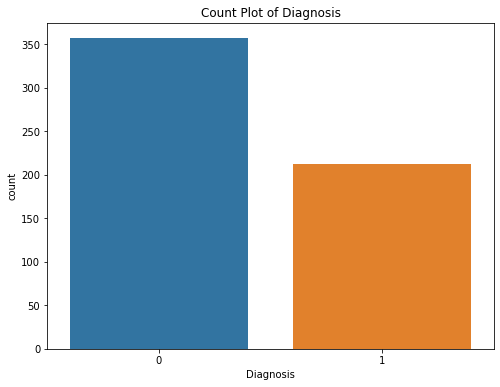

In [273]:
plt.figure(figsize=(8, 6))
sns.countplot(x="diagnosis", data=df)
plt.xlabel("Diagnosis")
plt.title("Count Plot of Diagnosis")

# Show the plot
plt.show()

<Figure size 576x432 with 0 Axes>

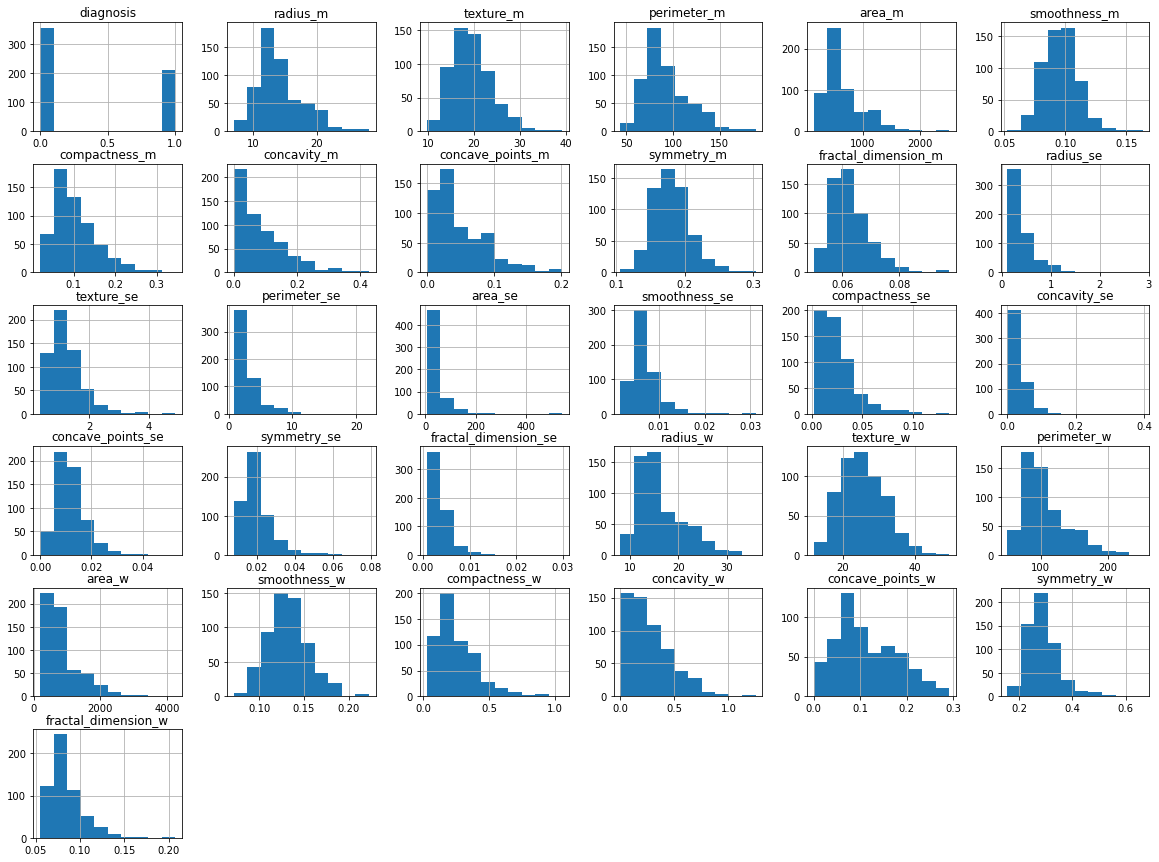

In [269]:
plt.figure(figsize=(8, 6))
# Plot a histogram for each numeric column
df.hist()

# Show the plot
plt.show()

To better understand the distribution of the data for each of the benign and malignant class, it will be useful if plot boxplots for all the columns separated by benign and malignant classes.

### References



Agarap, A. F. M. (2018, February). On breast cancer detection: an application of machine learning algorithms on the wisconsin diagnostic dataset. In Proceedings of the 2nd international conference on machine learning and soft computing (pp. 5-9).

Ak, M. F. (2020, April). A comparative analysis of breast cancer detection and diagnosis using data visualization and machine learning applications. In Healthcare (Vol. 8, No. 2, p. 111). MDPI.

American Cancer Society. (2021). Breast Cancer Facts & Figures 2021-2022. Retrieved from https://www.cancer.org/content/dam/cancer-org/research/cancer-facts-and-statistics/breast-cancer-facts-and-figures/breast-cancer-facts-and-figures-2021-2022.pdf

Chaurasia, V., & Pal, S. (2020). Applications of machine learning techniques to predict diagnostic breast cancer. SN Computer Science, 1(5), 1-11.

Ghosh, P., Karim, A., Atik, S. T., Afrin, S., & Saifuzzaman, M. (2021). Expert cancer model using supervised algorithms with a LASSO selection approach. International Journal of Electrical and Computer Engineering (IJECE), 11(3), 2631.

Umami, R. F., & Sarno, R. (2020, September). Analysis of Classification Algorithm for Wisconsin Diagnosis Breast Cancer Data Study. In 2020 International Seminar on Application for Technology of Information and Communication (iSemantic) (pp. 464-469). IEEE.

Zheng, B., Yoon, S. W., & Lam, S. S. (2014). Breast cancer diagnosis based on feature extraction using a hybrid of K-means and support vector machine algorithms. Expert Systems with Applications, 41(4), 1476-1482.

World Health Organization. (2021). Breast cancer. Retrieved from https://www.who.int/cancer/prevention/diagnosis-screening/breast-cancer/en/